## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# import statements

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Loading and inspecting data

df=pd.read_csv(r'c:\Udacity\ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# this returns a tuple of the dimensions of the dataframe

df.shape

#df.converted.value_counts()


(294478, 5)

c. The number of unique users in the dataset.

In [4]:
# this returns the number of unique values in each column

df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
# This will give mean value of converted column

pc=df['converted'].mean()
pc

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# This will count number of times the new_page and treatment have different values

df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
# Check for Null

df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Loading data in new data frame i.e df2

df2=pd.read_csv(r'c:\Udacity\ab_data.csv')

#Dropping those values from the columns where new_page and treatment have different values


df2.drop(df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].index, axis=0, inplace=True)

df2.shape

(290585, 5)

In [9]:
# Double Check all of the correct rows were removed - this should be 0

df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# this returns the number of unique values in each column

df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Return the repeated user id

DupSeries=(df2.user_id.value_counts()>1)

DupSeries.head(1)

773192    True
Name: user_id, dtype: bool

c. What is the row information for the repeat **user_id**? 

In [12]:
# This will print the duplicated rows
MDuplicates = df2.loc[df2.duplicated('user_id', keep=False)]

print(MDuplicates)

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Dropping one of the duplicated rows

MUnique = df2.drop_duplicates('user_id', keep='first', inplace=True)

df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# Calculating mean of converted value column

df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# Calculating mean of converted value column where group vale is "control"

df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# Calculating mean of converted value column where group vale is "treatment"

df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
# probability of an individual receiving the new page

np.random.randint(2, size=290585).mean()

0.5010203554897878

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

As mean value of those who are in 'control group'(i.e 0.1203) is higher than those who are in 'treatment group'i.e(0.1188). From the mean value, it seems that keeping old_page is better decision.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**


​ H0:  μn − μo ≤ 0

  and

​ H1:  μn − μo > 0

μn= Average under new page.<br><br>
μo= Average under old page

H0: Null Hypothesis: The old page will be better than or equal to new page (on average).<br><br>
H1: Alternative Hypothesis: The new page will be better than old page (on average).

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
# Mean of Pnew under null hypothesis

Pnew=df2['converted'].mean()
Pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
# Mean of Pold under null hypothesis

Pold=df2['converted'].mean()
Pold

0.11959708724499628

c. What is $n_{new}$?

In [20]:
# Sum of total landing_page where value is new_page

Nnew=(df2['landing_page'] == 'new_page').sum()
Nnew

145310

d. What is $n_{old}$?

In [21]:
# Sum of total landing_page where value is old_page

Nold=(df2['landing_page'] == 'old_page').sum()
Nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# Creating array of new_page_converted.
new_page_converted = []
Pnewe = np.random.binomial(1, Pnew, Nnew)
new_page_converted.append(Pnewe)
Pnewe.mean()

0.11970958640148648

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# Creating array of old_page_converted.
old_page_converted = []
Poldf = np.random.binomial(1, Pold, Nold).mean()
old_page_converted.append(Poldf)
Poldf.mean()

0.11828682351969382

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
# Difference in mean

Pactual = Pnewe - Poldf
Pactual.mean()

0.0014227628817926657

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [40]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping

p_diffs = []
  
Pnewh=(np.random.binomial(145310, Pnew, 10000)/145310)
Poldh=(np.random.binomial(145274, Pold, 10000)/145274)
# append the info 

p_diffs.append(Pnewh - Poldh)  

# Convert to numpy array
p_diffs = np.array(p_diffs)

#p_diffs = np.random.binomial(Nnew, Pnew, 10000)/Nnew - np.random.binomial(Nold, Pold, 10000)/Nold

(p_diffs).mean()



-7.487040421777283e-06

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

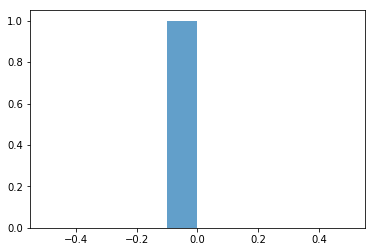

In [26]:
# Plotting histogram


plt.hist((p_diffs).mean(), alpha = 0.7);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [41]:
p_new = df2['converted'].mean()
p_old = df2['converted'].mean()
n_new = len(df2[df2['group'] == 'treatment'])
n_old = len(df2[df2['group'] == 'control'])
obs_diff = df2['converted'][df2['group'] == 'treatment'].mean() - df2['converted'][df2['group'] == 'control'].mean()
p_diffs = np.random.binomial(n_new, p_new, 10000)/n_new - np.random.binomial(n_old, p_old, 10000)/n_old
print ("Proportion Greater : {}".format((p_diffs > obs_diff).mean()))

Proportion Greater : 0.9104


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?



**Put your answer here.**

We computed P-value, we got (0.9104), which means we got staistically significant result, so we are not going to reject our Ho i.e null hypothsis, means we are going to keep our old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old =df2.query("landing_page == 'old_page' and converted == 1").shape[0]   # Result is 17489
convert_new =df2.query("landing_page == 'new_page' and converted == 1").shape[0] # Result is 17264
n_old = df2.shape[0] - df2.query("landing_page == 'new_page'").shape[0] # Result is 145274
n_new = df2.query("landing_page == 'new_page'").shape[0] # Result is 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
import statsmodels.api as sm
from scipy.stats import norm

# Calculating Z_Score and P_Value

z_score, p_value = sm.stats.proportions_ztest([17489, 17264], [145274, 145310], alternative='smaller')

z_score, p_value

(1.3109241984234394, 0.9050583127590245)

In [30]:
norm.cdf(z_score) , norm.ppf(1-(0.05/2))

(0.9050583127590245, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

P_value has a slight difference. As our z_score i.e (0.9050) is very less than our critical value i.e (1.9599), we will accept the null hypothesis

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.** <br><br>
We will be using discrete model because our dependent variable i.e 'group' is categorical.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [91]:
#Creating Columns

df['intercept'] = 1
dummies = pd.get_dummies(df['group'])
df_new = df.join(dummies)
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [92]:
## The below function creates 0, 1 coded dummy variables.

def dummy_cat(df, col):
   
    for idx, val_0 in enumerate(df[col].unique()):
        if idx + 1 < df[col].nunique():            
            df[val_0] = df[col].apply(lambda x: 0 if x == val_0 else 0)
        else:    
            df[val_0] = df[col].apply(lambda x: 1 if x == val_0 else 0)
            for idx, val_1 in enumerate(df[col].unique()):
                if idx + 1 < df[col].nunique():
                    df[val_1] = df[val_0] + df[val_1]
                else:
                    del df[val_1]
    return df

new_df = dummy_cat(df, 'group') 
df.rename(columns={'control': 'ab_page'}, inplace=True)
new_df.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [93]:

import statsmodels.api as sms;
from statsmodels.formula.api import logit

new_df['intercept'] = 1

#lm = sms.logit(new_df['converted'], new_df[['intercept', 'ab_page']])
logit_mod = sms.Logit(new_df['converted'], new_df[['intercept', 'ab_page']])

results = logit_mod.fit()

results

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [94]:
#Summary 

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Tue, 11 Sep 2018   Pseudo R-squ.:               7.093e-06
Time:                        12:23:38   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
ab_page       -0.0140      0.011     -1.237      0.216      -0.036       0.008
==============================================================================
"""

P_value i.e 0.216 related to ab_page is high, which suggests there is no statistical evidence that the population slope associated with ab_page in relating to conversion is zero. Also people might not convert becuase our ab_page coef value is in the negative as well. 

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**<br><br>
P-Value is 0.216. It is greater than 0.05 so we cannot reject our null hypothesis. Values are different because we use Z-Test which can be one sided or two sided. Here we use regression discrete model to compute p_value. We use dependent catagorical variable to compare with independent variable. Two sided hypothesis based on relationship. This p_value helps in predicting the responce for a particular variable. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**<br><br>
Other variables will also help us in pridicting the conversion rate of the website. Relationship between 'group' and 'converted' columns will break up becuase we added more variables. Secondly we require to have quantitative variables. If we add catagorical variable and it will break the model. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [95]:
countries_df = pd.read_csv(r'c:\Udacity\countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()


,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0


In [96]:
### Create the necessary dummy variables

df_new['intercept'] = 1

df_new[['UK','US','CA']]=pd.get_dummies(df_new['country'])
df_new[['old_page','new_page']]=pd.get_dummies(df_new['landing_page'])



In [97]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,UK,US,CA,old_page,new_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [98]:

#one way to implement that is to multiply the dummy variable created with each country (dummy variable) 


df_new['UK_Old_Page']=df_new['UK'] * df_new['old_page']
df_new['UK_New_Page']=df_new['UK'] * df_new['new_page']
df_new['US_Old_Page']=df_new['US'] * df_new['old_page']
df_new['US_New_Page']=df_new['US'] * df_new['new_page']
df_new['CA_Old_Page']=df_new['CA'] * df_new['old_page']
df_new['CA_New_Page']=df_new['CA'] * df_new['new_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,UK,US,CA,old_page,new_page,UK_Old_Page,UK_New_Page,US_Old_Page,US_New_Page,CA_Old_Page,CA_New_Page
user_id,,,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,0,1,1,0,0,0,0,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,0,1,0,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [99]:
### Fit Your Linear Model And Obtain the Results



import statsmodels.api as sms;
from statsmodels.formula.api import logit
#df_new['intercept'] = 1

#lm3 = sms.OLS(df_new['converted'], df_new[['intercept','UK','US','CA','old_page','new_page']])
#results3 = lm3.fit()
#results3.summary()

logit_mod = sms.Logit(df_new['converted'], df_new[['intercept','UK','US','CA','old_page','new_page', 'UK_Old_Page', 'UK_New_Page']])

results = logit_mod.fit()

results.summary()


         Current function value: 0.366111
         Iterations: 35


C:\Users\Aman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Aman\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Aman\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Aman\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Aman\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Tue, 11 Sep 2018   Pseudo R-squ.:               2.827e-05
Time:                        12:24:15   Log-Likelihood:            -1.0639e+05
converged:                      False   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1981
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.0684        nan        nan        nan         nan         nan
UK             -0.2901        nan        nan        nan         nan         nan
US             -0.3842   4.64e+04  -8.29e-06      1.000   -9.08e+04    9.08e+04
CA             -0.3941   4.72e+04  -8.35e-06      1.000   -9.25e+04    9.25e+04
old_page       -0.5404    1.3e+04  -4.16e-05      1.000   -2.55e+04    2.55e+04
new_page       -0.5281    1.3e+04  -4.06e-05      1.000   -2.55e+04    2.55e+04
UK_Old_Page    -0.1726        nan        nan        nan         nan         nan
UK_New_Page    -0.1174        nan        nan        nan         nan         nan
===============================================================================
"""

Smaller p_value suggest these variables are statically significant in relating to the response variable. COEF values of UK is less than US and similarly value of US is less than CA. Similarly COEF values of old page and new page are almost the same, which means both pages are equally poised. UK_Old_Page and UK_New_Page have diffferent coef values. 

<a id='conclusions'></a>
## Conclusions

Practically we should go for null hypothesis i.e old page will work better becuase we should follow the " innocence until proven guilty" rule. Also statistically, from the mean value, Z-Value and overall results suggest that we should keep our old page.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.